<h1 style="text-align:center; font-size:24px;">Name:Rohan Nachane</h1>


<h2 style="text-align:center; font-size:25px; color:blue;"><b>Practical 03-Multiple Linear Regression</b></h2>

In [27]:
import numpy as np
import pandas as pd

In [28]:
df=pd.read_csv("Startups.csv",na_values=[0.00])

In [1]:
#df


In [29]:
df.drop(['State'],axis=1,inplace=True)

In [30]:
df


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
#df.isnull()


In [20]:
df.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
Profit             0
dtype: int64

In [21]:
df=df.dropna()

In [10]:
#df

In [22]:
df.shape

(46, 4)

In [23]:
import seaborn as sns


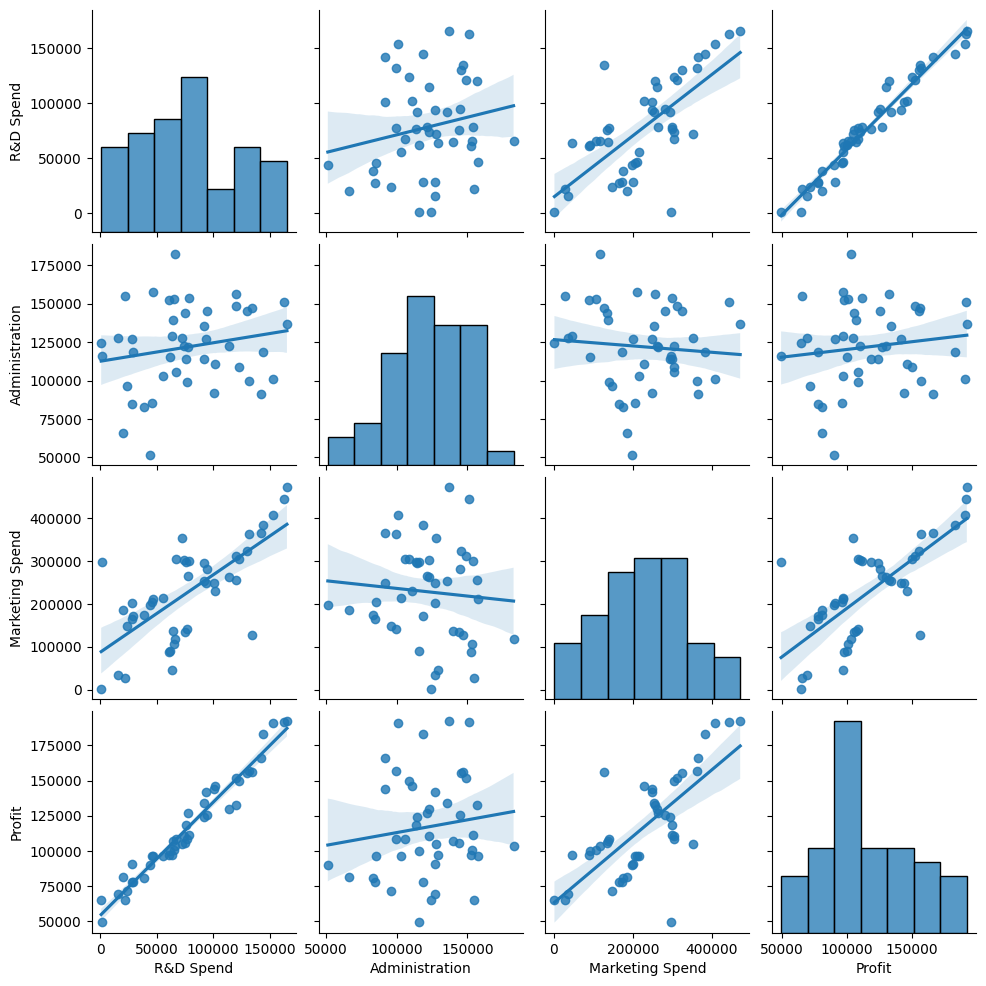

In [24]:
sns.pairplot(df,kind="reg")


<Axes: >

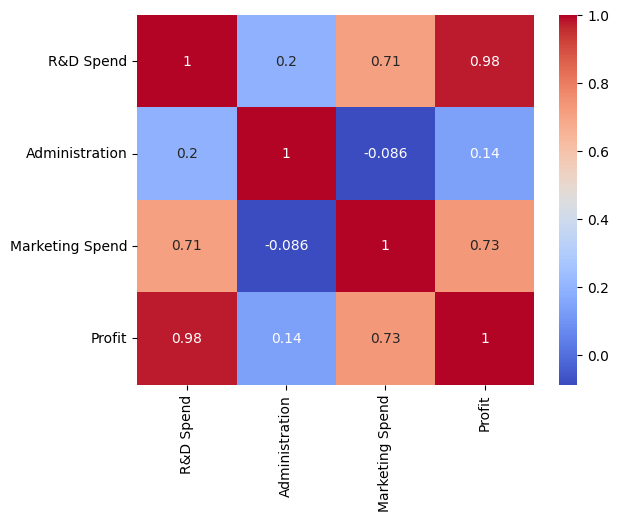

In [29]:
corr = df.corr()


In [30]:
x=df[['R&D Spend','Administration','Marketing Spend']]

In [11]:
#x

In [33]:
y=df.Profit

In [12]:
#y

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
#x_train

In [14]:
#y_train

In [15]:
#x_test

In [16]:
#y_test

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
model.intercept_

59648.59059766154

In [46]:
model.coef_

array([ 0.76660127, -0.05007309,  0.01399586])

In [47]:
y_pred=model.predict(x_test)

In [48]:
y_pred

array([ 93540.80420429,  65654.20844564, 177921.77042599, 114470.01563728,
       169745.6043875 , 103778.53992561, 115706.76783231, 102432.48027728,
       104163.68635766, 110389.33270804])

In [49]:
y_test

35     96479.51
43     69758.98
2     191050.39
22    110352.25
3     182901.99
29    101004.64
24    108552.04
32     97427.84
25    107404.34
23    108733.99
Name: Profit, dtype: float64

In [50]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})


In [51]:
df

,Actual,Predicted
35,96479.51,93540.804204
43,69758.98,65654.208446
2,191050.39,177921.770426
22,110352.25,114470.015637
3,182901.99,169745.604388
29,101004.64,103778.539926
24,108552.04,115706.767832
32,97427.84,102432.480277
25,107404.34,104163.686358
23,108733.99,110389.332708


In [67]:
from sklearn import metrics as m

In [69]:
m.mean_absolute_error(y_test,y_pred)


5727.551255944278

In [70]:
m.mean_squared_error(y_test,y_pred)


48506534.03819426

In [71]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

6964.66323939602

In [72]:
m.r2_score(y_test, y_pred)

0.9637818451357807